準備として、numpyとmatplotlibをimportとし、さらに何回も呼び出すときの省略形として、各々np、pltという短縮名をつけておきます。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 機械学習ライブラリ Scikit-Learn

機械学習の機能を使うために、Scikit-Learn (サイキット・ラーン)というライブラリをつかいます。「ライブラリ」が何のことか忘れてしまったひとは「第３回の講義資料」の「プログラミングとライブラリ」をWebサイトでチェックして、あわせてpractice03.ipynbの「モジュール」以降を復習してみてくださいね！

http://scikit-learn.org/

まず、sklearn.datasets をimportします。この中にいくつか例題データセットが入っています。

In [2]:
import sklearn.datasets

# 機械学習に使う手書き数字データ(再)

まず、最初の例として、手書き数字のデータを読み込みます。

In [3]:
data = sklearn.datasets.load_digits()
z = data['images']
y = data['target']

In [4]:
z.shape, y.shape

((1797, 8, 8), (1797,))

zには8x8の画像が1797枚、yには各々の画像がどの数字のデータかが格納されています。

1枚目の画像をみてみましょう。

In [5]:
z[0]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

データは「長さ8の数字のリストが8つ入ったリスト」です。値が大きい部分を黒、小さい部分を白として、表示してみましょう。

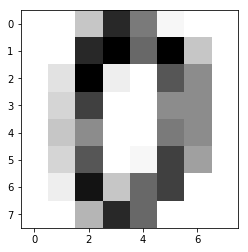

In [6]:
plt.imshow(z[0], cmap='Greys')

「0」ぽい手書き数字に見えます。このように「画像」データはコンピュータから見れば、単なる数字の配列です。

yのほうにはこのデータがどの文字のデータかの正解データが格納されています。

In [7]:
y[0]

0

やはり見た目どうり「0」の画像のようですね！

# データ自体をみてみよう

In [8]:
z.shape, y.shape

((1797, 8, 8), (1797,))

データは1797個あるので、下記の1行目を i = 0 〜 1796 で書き換えて、データをいろいろと見てみましょう！yの正解情報は、画像上部にタイトルとしてプロットするようにしています。

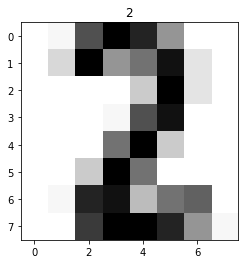

In [9]:
# この数字を色々と書き換えて実行することでデータを見てみよう
i = 1234

plt.imshow(z[i], cmap='Greys')
plt.title(y[i])
plt.show()

# 機械学習用にデータをリストに潰そう

もともとは「リストのリスト」になっているので、

In [10]:
z[0]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

2行目の3列目の値をえるには、2番目(index=1)のリストをとってきて

In [11]:
z[0][1]

array([  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.])

その3番目(index=2)の値をとればOKです。

In [12]:
z[0][1][2]

13.0

これは3つの値を指定するので、numpyでは、下記のように指定できます。1番目の画像(index=0)の、上から2番目(index=1)の左から3番目(index=2)の値は下記で得られます。3つの添え字で要素を指定するので、3つ座標値を決めると点の位置が決まるのに対応づけて「3次元の配列」などと呼びます。

In [13]:
z[0, 1, 2]

13.0

画像１枚を取り出してみると...

In [14]:
z2 = z[0]

In [15]:
z2.shape

(8, 8)

このように「2次元の配列」ということになりますね。(先週のようにカラー画像の場合は、それぞれの要素の値が「R,G,B」という長さ3のリストになるため、もう１次元増えます)

このように上からなんばん目、左からなんばん目という指定が便利な場合もありますが、特に数字のデータがあればOKな場合もあります。8x8の画像には64個の値があるので、これを一番上の一番左から順番にならべて長さ64のリストを作ります。

In [16]:
z[0]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

In [17]:
z[0].reshape(-1)

array([  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
        15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
         8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
         5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
         1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
         0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.])

このように「reshape(-1)」とすると、このように単なる数字のリストに潰れるのでしたね。

In [18]:
t = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]], [[9, 10], [11, 12]]])
t.shape

(3, 2, 2)

In [19]:
t.reshape(-1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

# 機械学習で用いるために配列を1次元につぶそう

それぞれの画像は1次元につぶして、配列として扱うことにするので、8 x 8 画像部分を長さ64の1次元配列に直します。全体を一気に直すには、下記のようにサイズを指定して、reshapeします。

In [20]:
x = z.reshape((1797, 64))

一応、0番目のデータが同じかどうかを確認しておきましょう。

In [21]:
x[0]

array([  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
        15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
         8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
         5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
         1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
         0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.])

In [22]:
z[0]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

In [23]:
z[0].reshape(-1)

array([  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
        15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
         8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
         5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
         1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
         0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.])

# 訓練データとテストデータに分けておこう

機械学習に用いる見本データ(訓練データやトレーニングデータと言います）と、実際に予測してみるデータ（テストデータと言います）を分けておきましょう。見本データが予測できるのは当たり前なので！

In [24]:
x.shape, y.shape

((1797, 64), (1797,))

1797あるので、1000枚を訓練データとし、のこりの797枚をテストデータとして、スライスを用いてデータを分けておきましょう。

In [25]:
x_train = x[:1000, :]
x_test = x[1000:, :]

In [26]:
y_train = y[:1000]
y_test = y[1000:]

うまく分けられたかどうかみるのに、それぞれの配列のサイズを見ておきましょう

In [27]:
x_train.shape

(1000, 64)

In [28]:
x_test.shape

(797, 64)

In [29]:
y_train.shape

(1000,)

In [30]:
y_test.shape

(797,)

うまくいってそうですね！

# 機械学習してみよう

さて、これを機械学習するための準備が整いました！！

Scikit-Learnから機械学習の分類アルゴリズムの一つであるExtraTreesというやり方をimportします。from ... importを忘れてしまった人は、practice03の「モジュール」以降を試してみてください！

ExtraTreesがどういうアルゴリズムなのかは専門的なのでここでは触れません。興味あったらググってみてください。あるいは、機械学習の授業を受けてみてください。(授業ではやらないかもしれないくらい専門的ですが)

In [31]:
from sklearn.ensemble import ExtraTreesClassifier

モデルを作るにはまず、機械学習アルゴリズムを決めて、予測モデルを設定します。ここでは「model」という変数に入れておきましょう。

In [32]:
model = ExtraTreesClassifier()

「訓練データ」として用意しておいた見本をつかって、x_trainを入れたら、y_trainの結果が出るようにモデルを機械学習します。これは入力と出力の見本対を指定して「fit」を呼び出すだけです。

In [33]:
model.fit(x_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

これでモデルの「学習」は終わりました。それではこの学習済みのモデルを使って、テストデータを予測してみましょう。構築したモデルで予測を行うには、fitしたのち、predictを呼び出すだけです。

In [34]:
y_pred = model.predict(x_test)

結果があっているかを確認してみましょう。

入力テストデータ

In [35]:
x_test[0]

array([  0.,   0.,   1.,  14.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,
        16.,   5.,   0.,   0.,   0.,   0.,   0.,   0.,  14.,  10.,   0.,
         0.,   0.,   0.,   0.,   0.,  11.,  16.,   1.,   0.,   0.,   0.,
         0.,   0.,   3.,  14.,   6.,   0.,   0.,   0.,   0.,   0.,   0.,
         8.,  12.,   0.,   0.,   0.,   0.,  10.,  14.,  13.,  16.,   8.,
         3.,   0.,   0.,   2.,  11.,  12.,  15.,  16.,  15.])

8x8にreshapeして画像として表示すると...

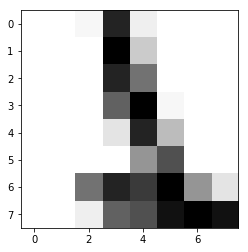

In [36]:
plt.imshow(x_test[0].reshape((8, 8)), cmap='Greys')

予測値

In [37]:
y_pred[0]

1

正解

In [38]:
y_test[0]

1

テストデータは何個あるかというと以下でわかるように797個あります。

In [39]:
y_test.shape

(797,)

なので、以下の j を j = 0〜796 の範囲でいろいろ変えて、機械学習による予測があっているか確認してみましょう。

Text(0.5,1,'Seikai=1, Yosoku=1')

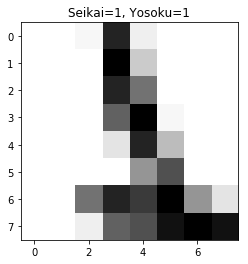

In [40]:
j = 0

plt.imshow(x_test[j].reshape((8, 8)), cmap='Greys')
plt.title('Seikai={}, Yosoku={}'.format(y_test[j], y_pred[j]))

テストデータ797個中、予測と正解がどれくらいあっているのかカウントしてみましょう。

In [41]:
seikai = 0
fuseikai = 0
for j in range(797):
    if y_pred[j] == y_test[j]:
        seikai += 1
    else:
        fuseikai += 1

print('seikai={}/797'.format(seikai))
print('fuseikai={}/797'.format(fuseikai))

seikai=714/797
fuseikai=83/797


機械学習予測の正答率は...

In [42]:
print('Seikai-Ritsu',100 * seikai/(seikai+fuseikai),'%')

Seikai-Ritsu 89.58594730238394 %


この正答率はモジュールを使っても計算できます。

In [43]:
from sklearn.metrics import accuracy_score
print('Seikai-Ritsu',100 * accuracy_score(y_test, y_pred),'%')

Seikai-Ritsu 89.5859473024 %


In [44]:
# if文やfor文を用いて以下に予測と正解があってない例を
# みつけて、実際に予測をまちがえてしまった画像を
# 表示してみるコードを書いて見ましょう
# また、その画像の数字を「どの他の数字と間違えたのか」を調べてみましょう

# hint：上記の例ではif文でカウントしているだけですが、
# 不正解の条件分岐のときにその画像をplt.imshowで表示して、「break」でfor文を抜ければいいですね！
# 「break」を忘れたひとはpractice01や04をcheckしてみてください。









なお、見本で用いた訓練データはどれくらい正解しているのか、一応みておきましょう。

In [45]:
y_pred_train = model.predict(x_train)

print('Seikai-Ritsu',100 * accuracy_score(y_train, y_pred_train),'%')

Seikai-Ritsu 100.0 %


# 発展) いろいろな機械学習アルゴリズム

さきほどはExtraTreesというアルゴリズムを使いましたが、機械学習のやりかたにはいろいろな手法があります。Scikit-learnで使えるものは、分類の場合は下記の公式ページで「Classification」を選ぶと一覧で見ることができます。各々の手法の詳細については、機械学習の教科書や論文を見る必要があるのでここではいろいろとあるんだな、くらいで留めておいてください。

http://scikit-learn.org/

http://scikit-learn.org/stable/supervised_learning.html#supervised-learning

ここでは、機械学習アルゴリズムを変えると、訓練データに対する正解率、テストデータに対する正解率がどのようになるか、観察して見ましょう。下記のmodel = の部分を下記から適当に選んで変えてみてください。

In [46]:
# この部分を下記のそれぞれで置き換えて実行してみてね

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()

# 以降はそのままでOK

model.fit(x_train, y_train)

y_pred = model.predict(x_test)
y_pred_train = model.predict(x_train)

print('for test data:')
print('Seikai-Ritsu',100 * accuracy_score(y_test, y_pred),'%')

print('for training data:')
print('Seikai-Ritsu',100 * accuracy_score(y_train, y_pred_train),'%')

for test data:
Seikai-Ritsu 90.0878293601 %
for training data:
Seikai-Ritsu 100.0 %


In [47]:
from sklearn.svm import SVC
model = SVC()

In [48]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [49]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [50]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [51]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

なお、本来は各々の手法にチューニングパラメタがあるので精度を出すためにはそれらを適切に調整する必要があります。

# 画像のプロットをさらに

複数の画像を一度にプロットするやりかたを少しみておきましょう。数字を一つづつプロットするのではなくて、たとえば、5こづつ2行でまとめて並べて表示してみます。5こづつ2列の場合は、5x2の表示マスのそれぞれに絵を埋めていく感じになります。これにはsubplot(2, 5, ○)を使います。○には左上から順番に1,2,...,10の番号が入ります。

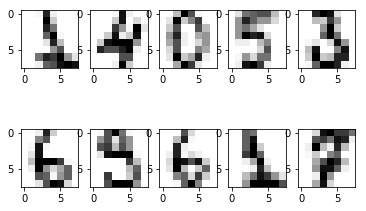

In [52]:
plt.subplot(2, 5, 1)
plt.imshow(x_test[0].reshape((8, 8)), cmap='Greys')

plt.subplot(2, 5, 2)
plt.imshow(x_test[1].reshape((8, 8)), cmap='Greys')

plt.subplot(2, 5, 3)
plt.imshow(x_test[2].reshape((8, 8)), cmap='Greys')

plt.subplot(2, 5, 4)
plt.imshow(x_test[3].reshape((8, 8)), cmap='Greys')

plt.subplot(2, 5, 5)
plt.imshow(x_test[4].reshape((8, 8)), cmap='Greys')


plt.subplot(2, 5, 6)
plt.imshow(x_test[5].reshape((8, 8)), cmap='Greys')

plt.subplot(2, 5, 7)
plt.imshow(x_test[6].reshape((8, 8)), cmap='Greys')

plt.subplot(2, 5, 8)
plt.imshow(x_test[7].reshape((8, 8)), cmap='Greys')

plt.subplot(2, 5, 9)
plt.imshow(x_test[8].reshape((8, 8)), cmap='Greys')

plt.subplot(2, 5, 10)
plt.imshow(x_test[9].reshape((8, 8)), cmap='Greys')

これはfor文をつかうと短くわかりやすくなりますね！ 最後に「」

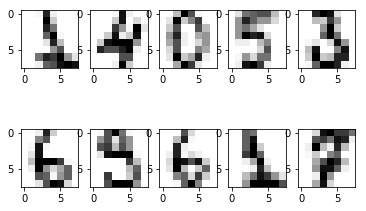

In [53]:
for j in range(2*5):
    plt.subplot(2, 5, j+1)
    plt.imshow(x_test[j].reshape((8, 8)), cmap='Greys')

最初にfigureで画像のサイズを調節して、最後にtight_layoutでレイアウトを綺麗にして、それぞれの画像には、正解と予測をタイトルで含めるようにしてみます。

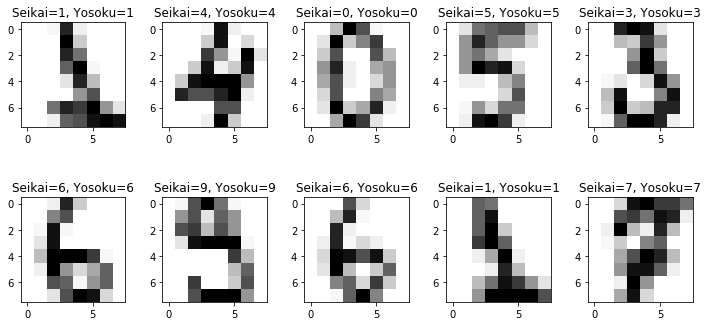

In [54]:
plt.figure(figsize=(10, 5))

for j in range(2*5):
    plt.subplot(2, 5, j+1)
    plt.title('Seikai={}, Yosoku={}'.format(y_test[j], y_pred[j]))
    plt.imshow(x_test[j].reshape((8, 8)), cmap='Greys')

plt.tight_layout()

In [55]:
# テストデータの中で、予測を間違えた事例のみを
# if文やfor文を使って複数まとめて表示してみましょう。











# おまけ：他のデータセット

余力があれば...

他のデータセットも同じように機械学習することができます。ここでは分かりやすさのために2次元にプロットできる例を作成してみましょう。これはランダムにデータをつくっているので毎回結果が変わります。何度か実行を試してみてください。

In [56]:
from sklearn.datasets import make_classification

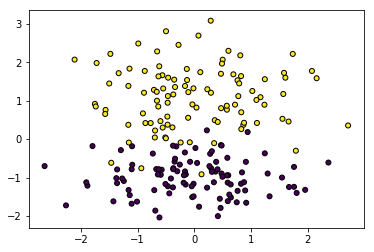

In [57]:
x_dat, y_dat = make_classification(n_features=2, n_samples=200, 
                                 n_redundant=0, n_informative=1,
                                 n_clusters_per_class=1)
plt.scatter(x_dat[:, 0], x_dat[:, 1], marker='o', c=y_dat,
            s=25, edgecolor='k')

データがどのようなものであれ、要領 は同じです。

In [58]:
x_train = x_dat[:100, :]
x_test = x_dat[100:, :]
y_train = y_dat[:100]
y_test = y_dat[100:]

In [59]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)
y_pred_train = model.predict(x_train)

print('for test data:')
print('Seikai-Ritsu',100 * accuracy_score(y_test, y_pred),'%')

print('for training data:')
print('Seikai-Ritsu',100 * accuracy_score(y_train, y_pred_train),'%')

for test data:
Seikai-Ritsu 94.0 %
for training data:
Seikai-Ritsu 100.0 %


以下は説明しませんが、学習された予測がどのような線を引いたことになっているのか、予測点を細かく区切った点でいろいろ試してみて、色付けしてプロットしてみるコードです。

機械学習アルゴリズムを変えると、それぞれのアルゴリズムがどのように分類境界を学習するのか視覚化することができます。さきほどの例とおなじようにコードのmodel定義の部分を変えてみて実行してみると良いでしょう！

In [60]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [61]:
xx, yy = make_meshgrid(x_dat[:, 0], x_dat[:, 1])

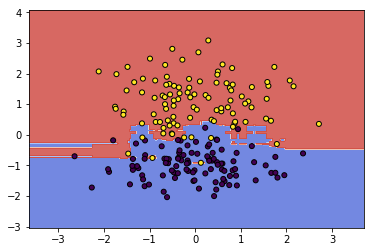

In [62]:
plot_contours(plt, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(x_dat[:, 0], x_dat[:, 1], marker='o', c=y_dat,
            s=25, edgecolor='k')

コードについては下記の公式例からとっています。

http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html